# Time series forecasting - RNN

- RNN can predict/ classify next value(s) in a sequence.
- A sequence is stored as matrix, where each row is a feature vector that describes it.(order of the rows in the matrix matters)
- The backpropagation algorithm breaks down when applied to RNNs because of the recurrent connections. Unrolling the network, converts RNN into a regular Feedforward network and Backpropagation through time can be applied.

### Problems Classical RNNs: 
- Vanishing / Exploding gradients ( weights can become very small or very large respectively )
- Problem with their memory( Long term dependencies )
- Solution by using gated RNNs : Stores information with `read/ write /delete` from the memory are learned from the data.
- The two most commonly used gated RNNs are Long Short-Term Memory Networks and Gated Recurrent Unit Neural Networks.

## LSTM

- Able to learn the context required to make predictions in time series forecasting problems, rather than having this context pre-specified and fixed.

In [41]:
# Forecasting the values of Sine Function

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [42]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16,10

RANDOM_SEED = 25

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

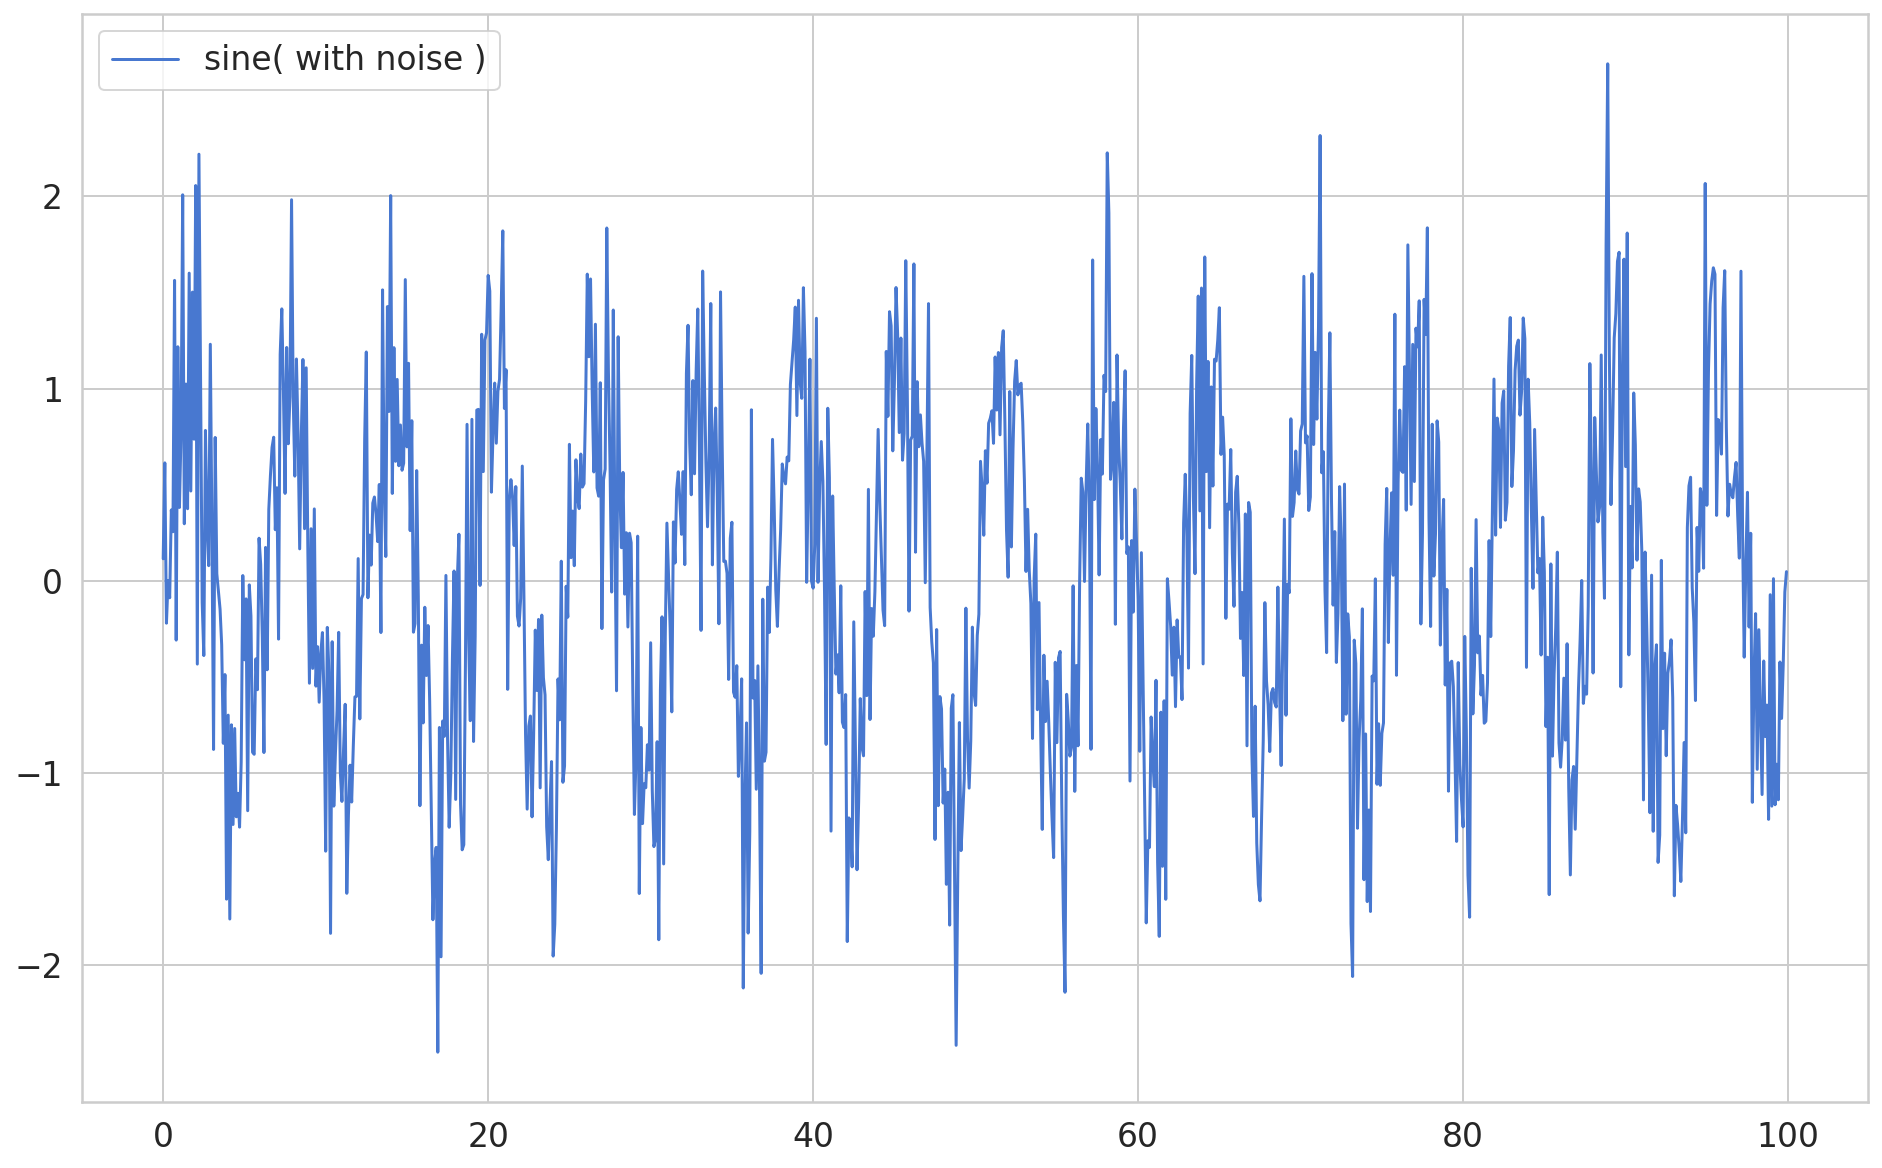

In [43]:
time = np.arange(0,100,0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

plt.plot(time, sin, label='sine( with noise )')
plt.legend()

In [44]:
# Preprocessing

df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])

train_size = int(len(df)*0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

800 200


In [45]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)

X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


In [46]:
# Modelling

model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=128,
    input_shape = (X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))

model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.001)
)

In [47]:
# Training

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/30
45/45 [==============================] - 0s 9ms/step - loss: 0.4436 - val_loss: 0.4040
Epoch 2/30
45/45 [==============================] - 0s 4ms/step - loss: 0.3559 - val_loss: 0.3891
Epoch 3/30
45/45 [==============================] - 0s 4ms/step - loss: 0.3461 - val_loss: 0.3879
Epoch 4/30
45/45 [==============================] - 0s 4ms/step - loss: 0.3442 - val_loss: 0.3868
Epoch 5/30
45/45 [==============================] - 0s 4ms/step - loss: 0.3424 - val_loss: 0.3856
Epoch 6/30
45/45 [==============================] - 0s 4ms/step - loss: 0.3408 - val_loss: 0.3840
Epoch 7/30
45/45 [==============================] - 0s 4ms/step - loss: 0.3390 - val_loss: 0.3818
Epoch 8/30
45/45 [==============================] - 0s 4ms/step - loss: 0.3368 - val_loss: 0.3791
Epoch 9/30
45/45 [==============================] - 0s 4ms/step - loss: 0.3343 - val_loss: 0.3767
Epoch 10/30
45/45 [==============================] - 0s 4ms/step - loss: 0.3321 - val_loss: 0.3748
Epoch 11/30
45/45 [

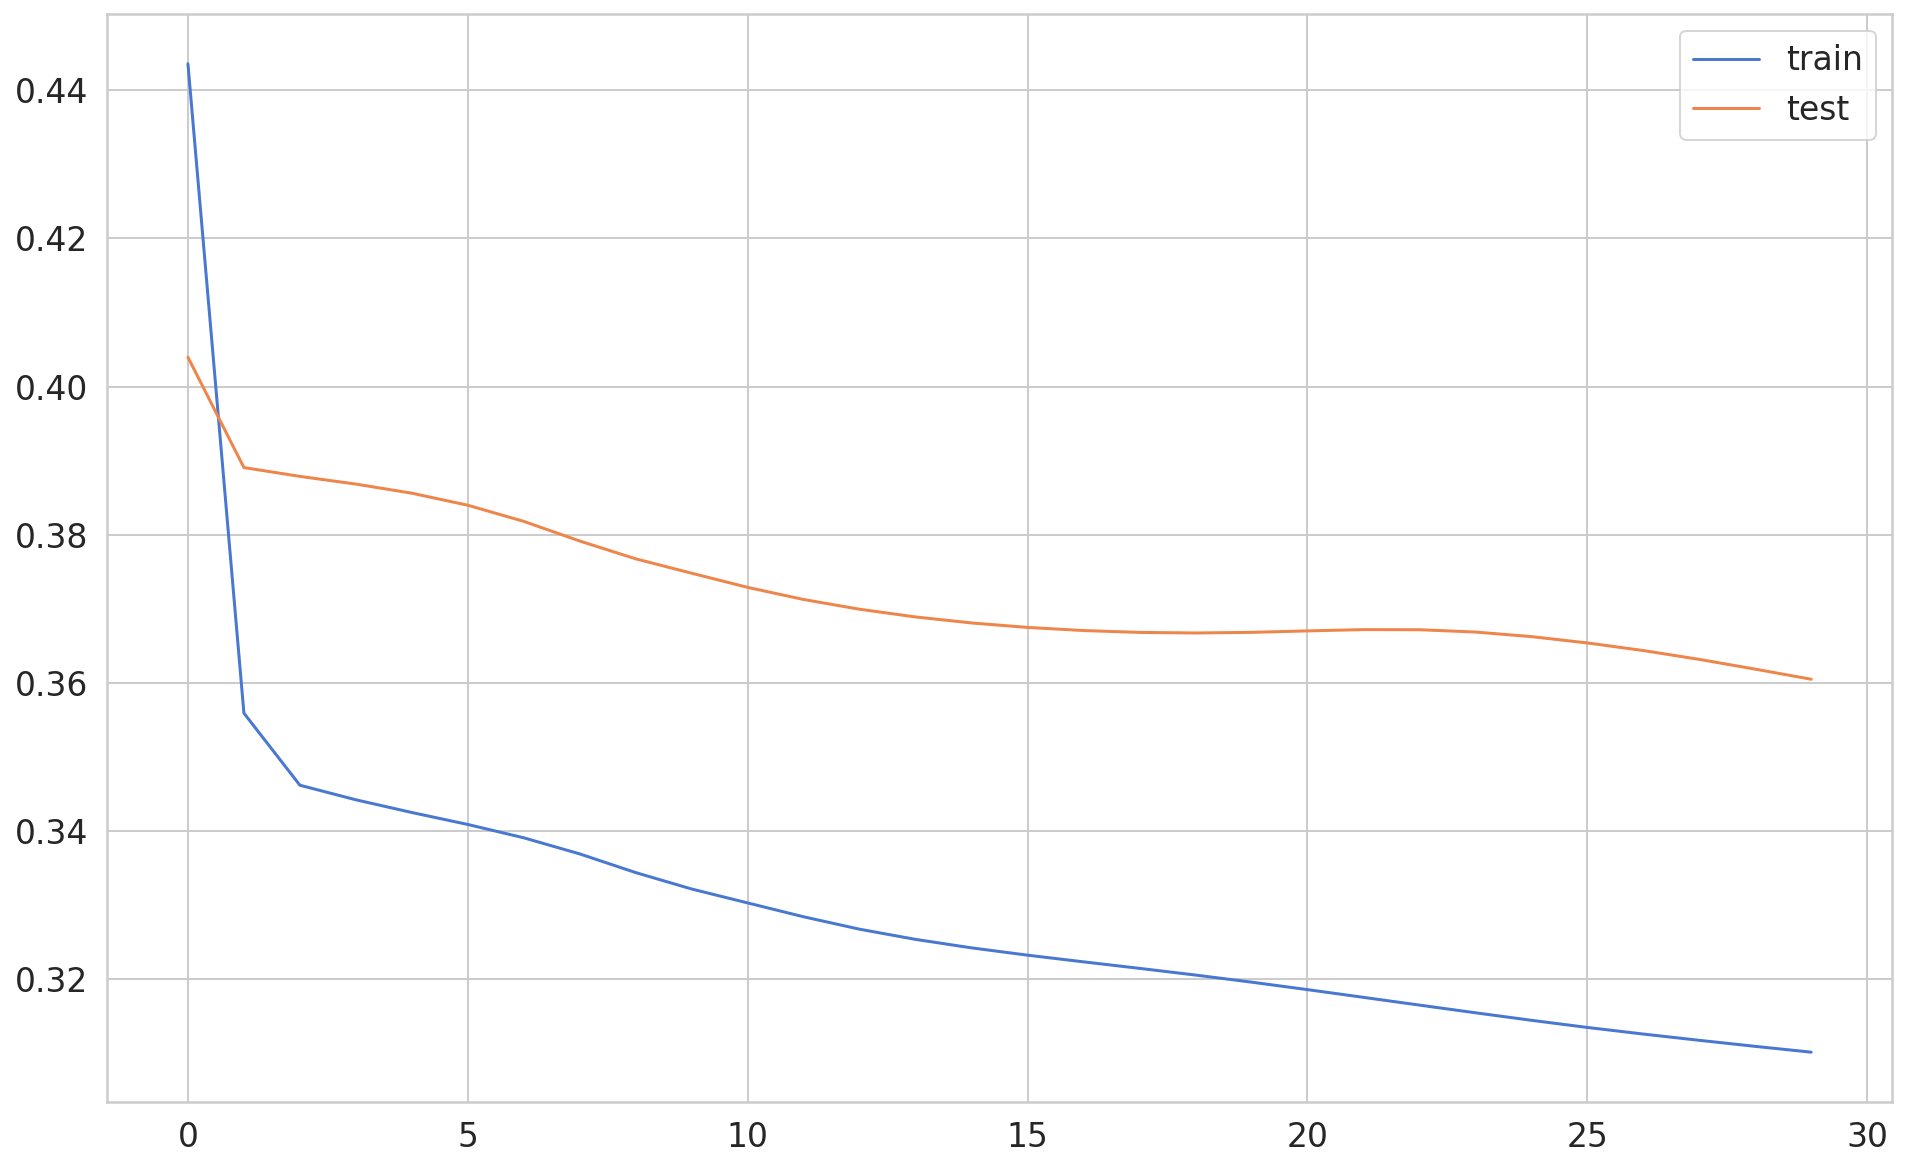

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [49]:
y_pred = model.predict(X_test)

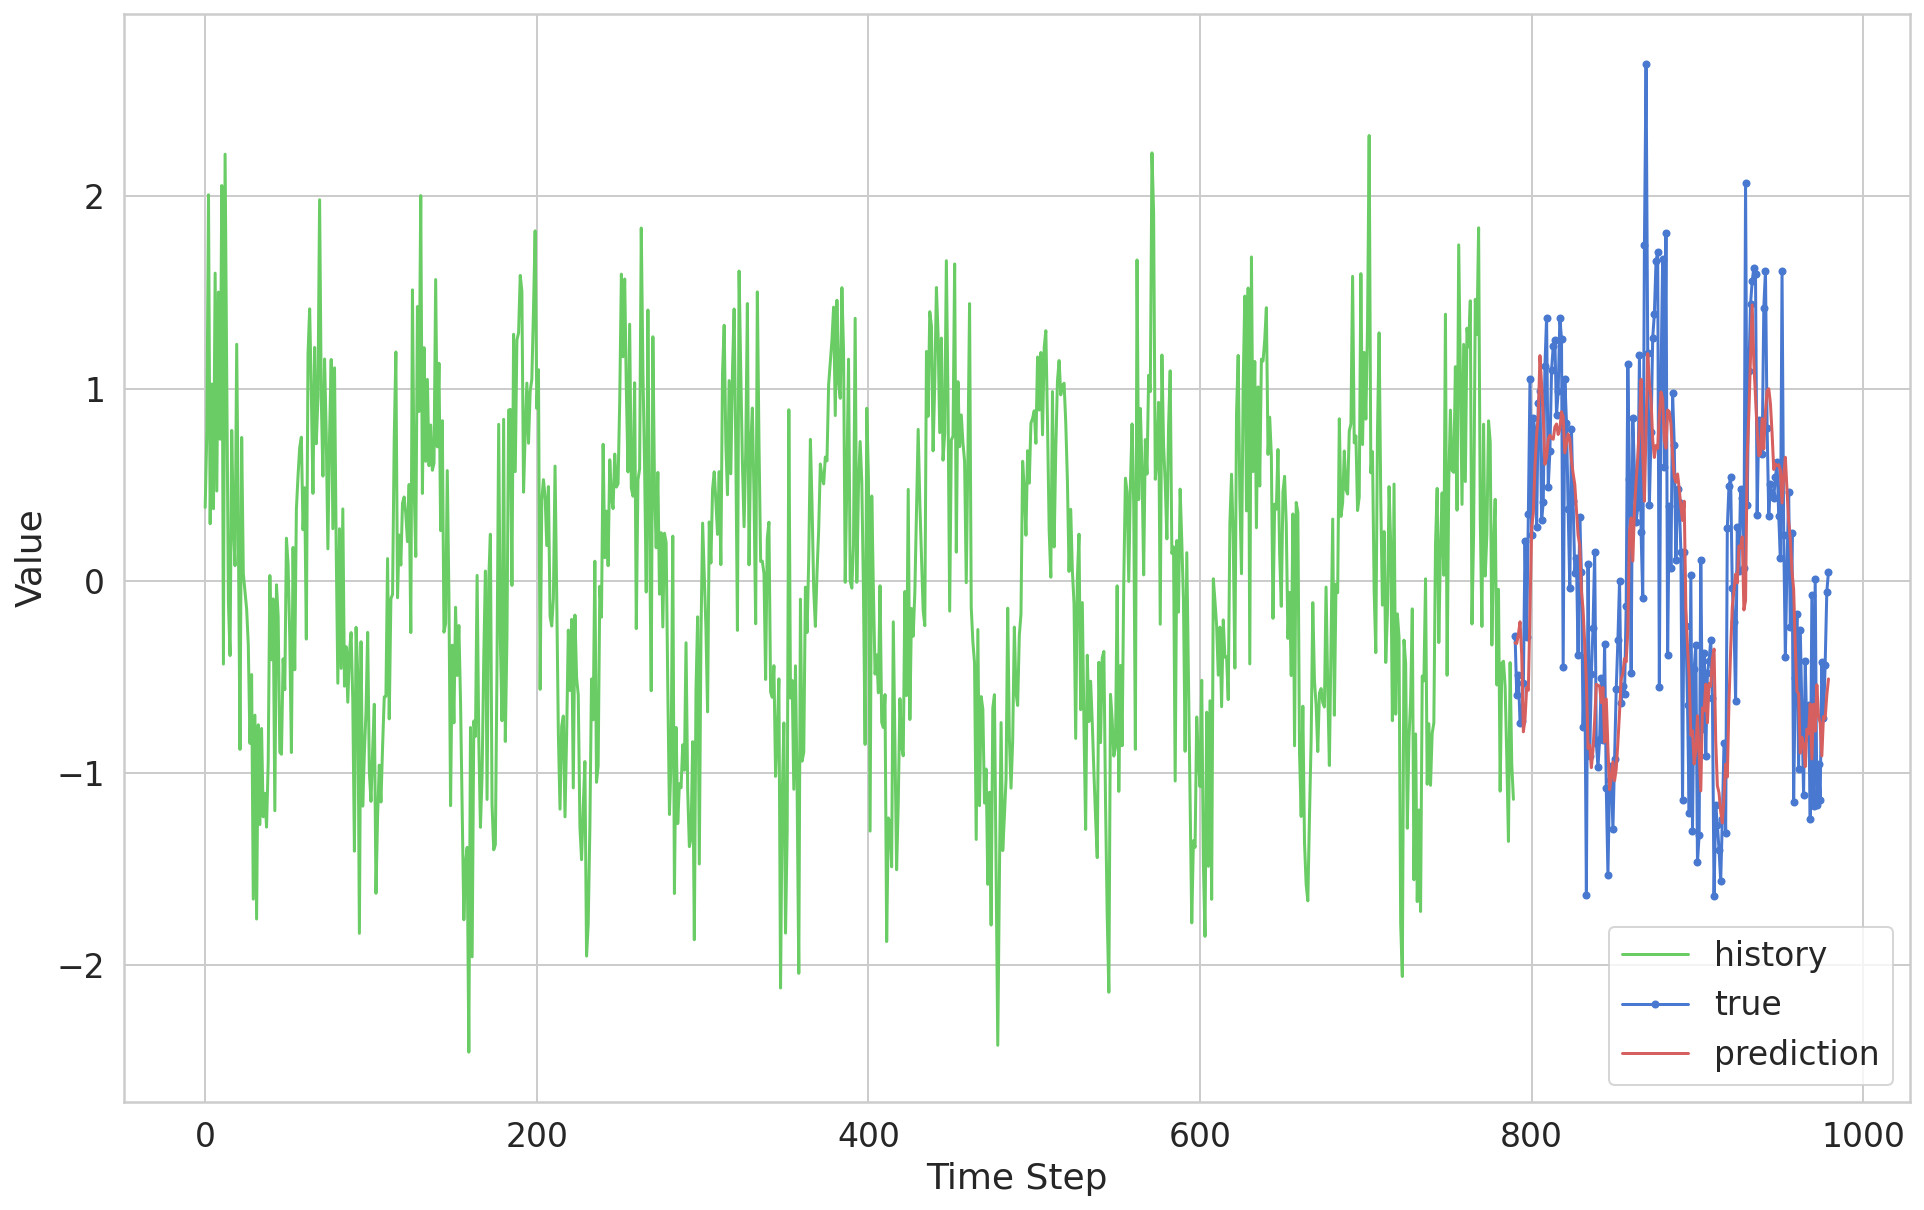

In [50]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

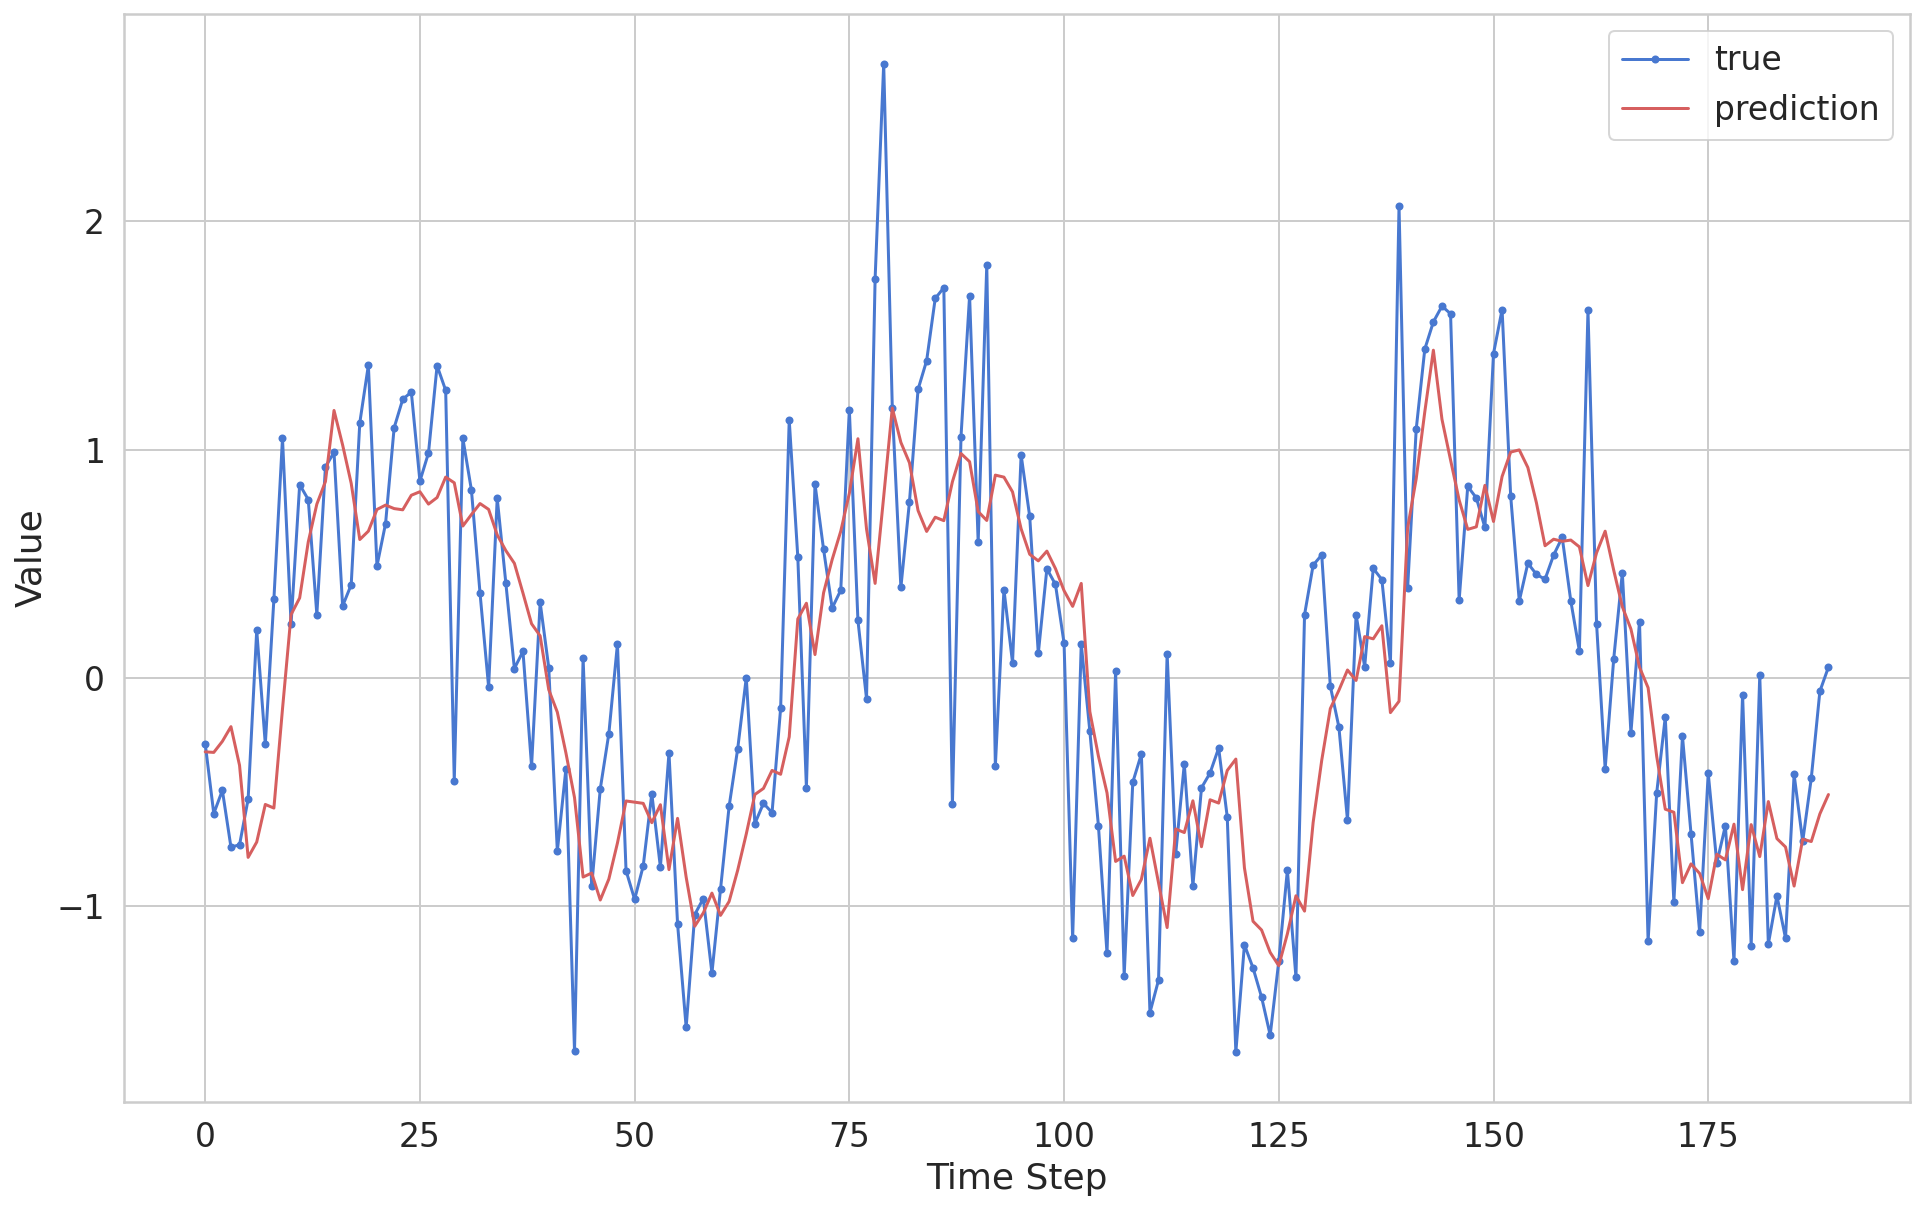

In [51]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

***